# Clustering

This script performs clustering of the person-reads based on the boolean matrix.

In [33]:
#################################################################################
# This script is for the automation of the clustering.Rmd R markdown file.
#################################################################################
print('')
print('CLUSTERING')
print('  loading libraries')

[1] ""
[1] "CLUSTERING"
[1] "  loading libraries"


# Load modules

In [34]:
library(tidyverse, quietly = TRUE)
library(factoextra)
library(FactoMineR)
library(dplyr)

# Set parameters

In [35]:
datadir = '/mnt/aretian/genomics/nanopore/'
run_number = 'run1'
chr='chr11'

# Helper functions

In [36]:
print('  creating functions')

mysplit <- function(x) {
  y <- unlist(strsplit(x, '-'))[1]
  return(y)
}

constfunc <- function(x) {
  if (length(unique(x)) > 1) {return(1)}
  else {return(0)}
}

[1] "  creating functions"


# Load data

In [37]:
print('  loading data')
# args = commandArgs(trailingOnly=TRUE)
# fid = args[1]
# disease = args[2]

data <- read.csv(paste0(datadir,run_number,'/',run_number,'_',chr,'_bool_tagged_reads.csv'), stringsAsFactors = FALSE)
data$sample <- unlist(lapply(data$read_id, mysplit))

data$sample <- as.factor(data$sample)
data_nolabels <- data %>% select(-read_id, -sample)

# remove constant columns
presents_variation <- apply(X = data_nolabels, MARGIN = 2, FUN = constfunc)
presents_variation <- as.logical(presents_variation)

data_nolabels_noconstants <- data_nolabels[,presents_variation]

[1] "  loading data"


# Implementation

In [38]:
#################################################################################
# K-means Clustering
#################################################################################
set.seed(123)

kres <- kmeans(data_nolabels_noconstants, centers = 2)

# paste0('/mnt/aretian/genomics/nanopore/run1/bool_tagged_reads.csv')

png(file=paste0(datadir,run_number,'/',run_number,'_',chr,'_assigned_kmeans_clusters.png'))
fviz_cluster(kres, data = data_nolabels_noconstants, labelsize = 0,
             ellipse = TRUE, ellipse.type = "convex",
              ellipse.level = 0.95, ellipse.alpha = 0.2,
             main = 'K-Means clustering results: Assigned clusters',
             submain = 'Person0-Person1 merged samples',
#              caption = paste0(mid, ' = mother, ', cid, ' = child'),
             xlab = 'PC1',
             ylab = 'PC2',
             palette = 'Set2') + 
  theme_bw()
dev.off()

kres_lab <- kres # color by real group
kres_lab$cluster <- data$sample

png(file=paste0(datadir,run_number,'/',run_number,'_',chr,'_real_sample_labels.png'))
fviz_cluster(kres_lab, data = data_nolabels_noconstants, labelsize = 0,
             ellipse = TRUE, ellipse.type = "convex",
              ellipse.level = 0.95, ellipse.alpha = 0.2,
             main = 'K-Means clustering results: Actual sample labels', 
             submain = 'Person0-Person1 merged samples',
#              caption = paste0(mid, ' = mother, ', cid, ' = child'),
             xlab = 'PC1',
             ylab = 'PC2',
             palette = 'Set1') + 
  theme_bw()
dev.off()

data$kmeans_clusters <- kres$cluster
write.csv(data, paste0(datadir,run_number,'/',run_number,'_',chr,'_kmeans_clusters.csv'), row.names = FALSE)

png 
  2

png 
  2

# View Clustering results

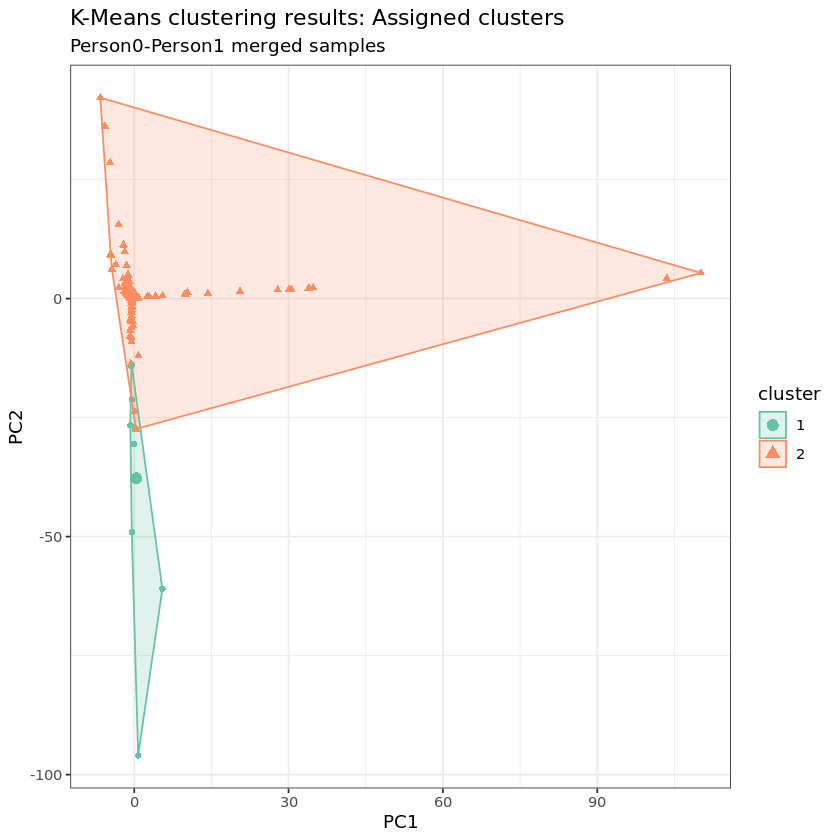

In [28]:
fviz_cluster(kres, data = data_nolabels_noconstants, labelsize = 0,
             ellipse = TRUE, ellipse.type = "convex",
              ellipse.level = 0.95, ellipse.alpha = 0.2,
             main = 'K-Means clustering results: Assigned clusters',
             submain = 'Person0-Person1 merged samples',
#              caption = paste0(mid, ' = mother, ', cid, ' = child'),
             xlab = 'PC1',
             ylab = 'PC2',
             palette = 'Set2') + 
  theme_bw()

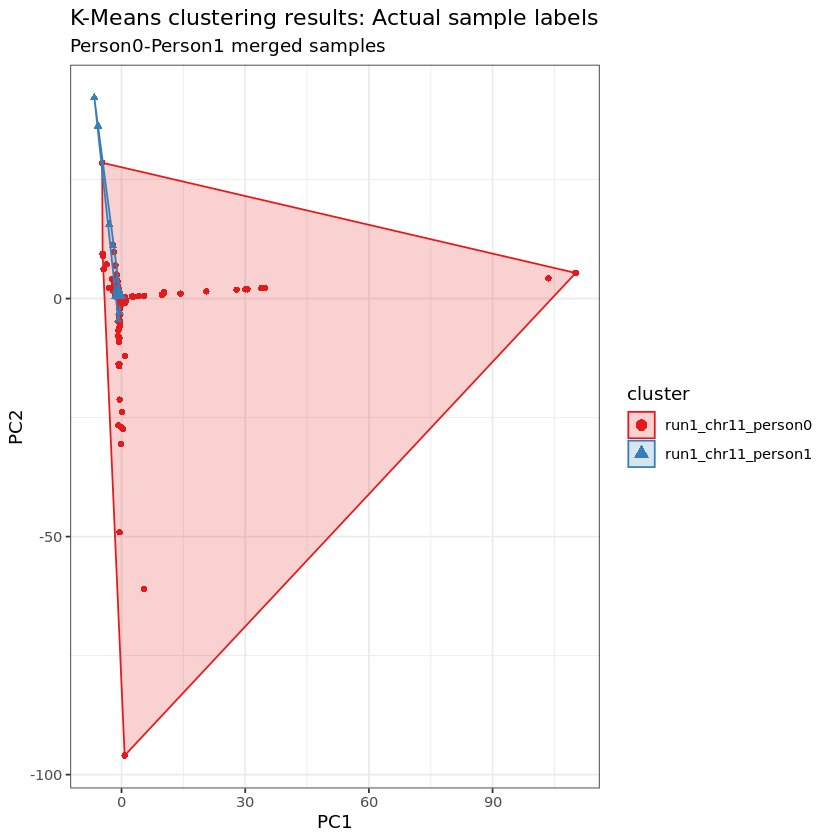

In [32]:
fviz_cluster(kres_lab, data = data_nolabels_noconstants, labelsize = 0,
             ellipse = TRUE, ellipse.type = "convex",
              ellipse.level = 0.95, ellipse.alpha = 0.2,
             main = 'K-Means clustering results: Actual sample labels', 
             submain = 'Person0-Person1 merged samples',
#              caption = paste0(mid, ' = mother, ', cid, ' = child'),
             xlab = 'PC1',
             ylab = 'PC2',
             palette = 'Set1') + 
  theme_bw()